In [1]:
# code, run by pressing "run" button to the left of this comment

# import necessary packages
from plotnine import *
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%precision %.7g
%matplotlib inline

In [2]:
# code, run by pressing "run" button to the left of this comment

# import data and check for missing rows
data = pd.read_csv("https://raw.githubusercontent.com/MNGSunday/PublicData_for_CPSC354/main/LanguageRepositories_Nov2022.csv", encoding='windows-1254')
print("Missing data per column: ")
print(data.isna().sum())
print("Original data frame size: ", len(data), " rows")

Missing data per column: 
Repository Language             0
Active Repositories             0
Total Pushes                    0
Pushes Per Repository           0
New Forks Per Repository        0
Opened Issues Per Repository    0
New Watchers Per Repository     0
Appeared In Year                0
dtype: int64
Original data frame size:  30  rows


# **Q1.**
(Linear Regression) When predicting when the year a particular Programming Language was released, which predictors (Active Repositories, Total Pushes, Total Pushes, Pushes Per Repository, New Forks Per Repository, Opened Issues Per Repository, and New Watchers Per Repository) improves the accuracy of the model’s prediction when excluded from the model? What does this suggest about the nature of the Programming Languages used in GitHub repositories?

In [3]:
# code, run by pressing "run" button to the left of this comment

# Preview of the first five lines of the dataset
data.head()

,Repository Language,Active Repositories,Total Pushes,Pushes Per Repository,New Forks Per Repository,Opened Issues Per Repository,New Watchers Per Repository,Appeared In Year
0,JavaScript,323938,3461415,10.69,3.87,6.10,9.66,1995
1,Java,222852,2323315,10.43,3.48,6.67,6.24,1995
2,Python,164852,1654226,10.03,2.87,6.32,5.72,1991
3,CSS,164585,1810013,11.00,4.91,5.24,9.33,1996
4,PHP,138771,1391467,10.03,2.78,5.87,4.76,1995


In [4]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model containing all of the predictor variables
predictors_all = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

outcome = data[["Appeared In Year"]]

# Randomly split the data to use 80% of the data for training and 20% for testing for model validation
x_train, x_test, y_train, y_test = train_test_split(data[predictors_all], outcome,
                                                    test_size= 0.2,
                                                    random_state = 40)

# Z-score predictor variables for both training and testing data
z = StandardScaler()
x_train[predictors_all] = z.fit_transform(x_train[predictors_all])
x_test[predictors_all] = z.transform(x_test[predictors_all])

# Linear Regression Model for model containing all predictor variables
lr_all = LinearRegression()
lr_all.fit(x_train[predictors_all], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model containing all variables...")
print("Training data R2 Score:", r2_score(y_train, lr_all.predict(x_train[predictors_all])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_all.predict(x_train[predictors_all])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_all.predict(x_test[predictors_all])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_all.predict(x_test[predictors_all])))

For the Linear Regression Model containing all variables...
Training data R2 Score: 0.16331385155948508
Training data Mean Squared Error Score: 105.21183058627594


Testing data R2 Score: 0.4232737382895424
Training data Mean Squared Error Score:  80.82177750914607


In [6]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Active Repositories
exclude_active = ["Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Active Repositories
lr_no_active = LinearRegression()
lr_no_active.fit(x_train[exclude_active], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Active Repositories...")
print("Training data R2 Score:", r2_score(y_train, lr_no_active.predict(x_train[exclude_active])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_active.predict(x_train[exclude_active])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_active.predict(x_test[exclude_active])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_active.predict(x_test[exclude_active])))

For the Linear Regression Model excluding Number of Active Repositories...
Training data R2 Score: 0.14928609973685336
Training data Mean Squared Error Score: 106.97579602423606


Testing data R2 Score: 0.42825473624864563
Training data Mean Squared Error Score:  80.12374598959953


In [7]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Total Pushes
exclude_push_total = ["Active Repositories", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Total Pushes
lr_no_push_total = LinearRegression()
lr_no_push_total.fit(x_train[exclude_push_total], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Total Pushes...")
print("Training data R2 Score:", r2_score(y_train, lr_no_push_total.predict(x_train[exclude_push_total])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_push_total.predict(x_train[exclude_push_total])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_push_total.predict(x_test[exclude_push_total])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_push_total.predict(x_test[exclude_push_total])))

For the Linear Regression Model excluding Number of Total Pushes...
Training data R2 Score: 0.15172857789930394
Training data Mean Squared Error Score: 106.66865863572139


Testing data R2 Score: 0.4230374299603413
Training data Mean Squared Error Score:  80.8548934958355


In [8]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Pushes per Repository
exclude_repository_pushes = ["Active Repositories", "Total Pushes",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Pushes per Repository
lr_no_repository_pushes = LinearRegression()
lr_no_repository_pushes.fit(x_train[exclude_repository_pushes], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Pushes Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_repository_pushes.predict(x_train[exclude_repository_pushes])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_repository_pushes.predict(x_train[exclude_repository_pushes])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_repository_pushes.predict(x_test[exclude_repository_pushes])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_repository_pushes.predict(x_test[exclude_repository_pushes])))

For the Linear Regression Model excluding Number of Pushes Per Repository...
Training data R2 Score: 0.15398523175241896
Training data Mean Squared Error Score: 106.384888331494


Testing data R2 Score: 0.3429048737808713
Training data Mean Squared Error Score:  92.0845808826529


In [9]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Forks Per Repository
exclude_forks = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "Opened Issues Per Repository", "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Forks Per Repository
lr_no_forks = LinearRegression()
lr_no_forks.fit(x_train[exclude_forks], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Forks Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_forks.predict(x_train[exclude_forks])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_forks.predict(x_train[exclude_forks])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_forks.predict(x_test[exclude_forks])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_forks.predict(x_test[exclude_forks])))

For the Linear Regression Model excluding Number of Forks Per Repository...
Training data R2 Score: 0.1632898597934973
Training data Mean Squared Error Score: 105.21484750919653


Testing data R2 Score: 0.4237568659311758
Training data Mean Squared Error Score:  80.75407253825607


In [10]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Opened Issues Per Repository
exclude_issues = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Opened Issues Per Repository
lr_no_issues = LinearRegression()
lr_no_issues.fit(x_train[exclude_issues], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Opened Issues Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_issues.predict(x_train[exclude_issues])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_issues.predict(x_train[exclude_issues])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_issues.predict(x_test[exclude_issues])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_issues.predict(x_test[exclude_issues])))

For the Linear Regression Model excluding Number of Opened Issues Per Repository...
Training data R2 Score: 0.16289020662991227
Training data Mean Squared Error Score: 105.26510320067506


Testing data R2 Score: 0.43602910973274733
Training data Mean Squared Error Score:  79.03425392773026


In [11]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of New Watchers Per Repository
exclude_watchers = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository"]

# Linear Regression Model for model exlcuding Number of New Watchers Per Repository
lr_no_watchers = LinearRegression()
lr_no_watchers.fit(x_train[exclude_watchers], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of New Watchers Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_watchers.predict(x_train[exclude_watchers])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_watchers.predict(x_train[exclude_watchers])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_watchers.predict(x_test[exclude_watchers])))
print("Training data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_watchers.predict(x_test[exclude_watchers])))

For the Linear Regression Model excluding Number of New Watchers Per Repository...
Training data R2 Score: 0.07326075328163195
Training data Mean Squared Error Score: 116.53585135253145


Testing data R2 Score: 0.15754222250650884
Training data Mean Squared Error Score:  118.06109687374065


# **Q2.**
(Clustering) When considering the number of Opened Issues Per Repository and the number of New Watchers Per Repository, what clusters emerge? What can be said about those clusters? What percentage of those clusters contain Programming Languages that were released prior to 1993?

In [12]:
# code, run by pressing "run" button to the left of this comment

# Copy of the Programming Languages Dataset specifically for this clustering section

cluster_data = pd.read_csv("https://raw.githubusercontent.com/MNGSunday/PublicData_for_CPSC354/main/LanguageRepositories_Nov2022.csv", encoding='windows-1254')

In [13]:
# code, run by pressing "run" button to the left of this comment

# Establish and Z-Score variables for copy of the dataset for the clustering section
important_variables = ["Repository Language", "Opened Issues Per Repository",
                       "New Watchers Per Repository", "Appeared In Year"]
cluster_variables = ["Opened Issues Per Repository", "New Watchers Per Repository"]

zCluster = cluster_data[important_variables]

# Z-Score the variables used for the Clustering Model
cluster_z = StandardScaler()
cluster_z.fit(zCluster[cluster_variables])
zCluster[cluster_variables] = cluster_z.transform(zCluster[cluster_variables])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


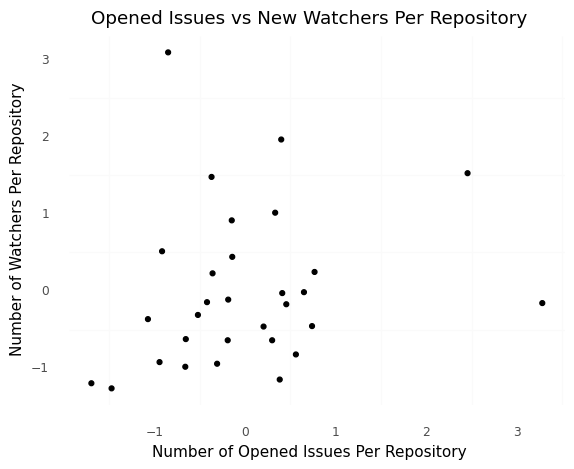

<ggplot: (8735967031945)>

In [14]:
# code, run by pressing "run" button to the left of this comment

# General Scatterplot Diagram for Opened Issues Per Repository vs
# New Watchers Per Repository without Clustering
(ggplot(zCluster, aes(x = "Opened Issues Per Repository",
                     y = "New Watchers Per Repository")) + geom_point() +
  theme_minimal() + theme(panel_grid_major = element_blank()) +
 labs(x = "Number of Opened Issues Per Repository", y = "Number of Watchers Per Repository",
      title = "Opened Issues vs New Watchers Per Repository")) 

> In this section, the assumptions of different clustering algorithms is discussed and is used to assess which clustering algorithms would work the best and the worst with the above scatterplots.

&nbsp;&nbsp;&nbsp;&nbsp;The **KMeans** algorithm is a rather simple clustering method that attempts to find K centroids in the data, where K is a number either decided by the user or randomly generated. In turn, the algorithm attempts to run until the points assigned to each cluster do not change or the location of the centroid in each cluster does not significantly change. **KMeans** also assumes that the variance of each predictor in each cluster is consistent, which would mean that the **KMeans** algorithm would be most effective on spherical-shaped clusters of data, which does not appear to be very present in the above scatterplots. Because of this, **KMeans** would likely not be a good choice of clustering algorithm for this data.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;The **Gaussian Mixture Models (EM)** model, while similar to the **KMeans** model, assumes that there are multiple normal distributions within the data, where such distributions are used to determine the clusters in the data. Unlike **KMeans**, **EM** assumes that the variance of each predictor in the cluster is different, meaning that the **EM** model would be most effective for elliptical or spherical shaped clusters of data. While this can be effective for the above scatterplots, **EM** is suseptible to including "noise" data points in its clusters, which can potentially throw off the calculation of each cluster in the data. While a better option than **KMeans**, **EM** might not be a good choice of clustering model for the data.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;The **DBSCAN** clustering algorithm does not make any assumptions about the potential shape of clusters within the data, which already makes it a better option than **KMeans** and **EM** due to its assumptions about the variance of each predictor within said clusters. In addition to this, **DBSCAN** also ignores "noise" points, which are essentially outlier points, which the two previous algorithms are suseptible to as they attempt to use every point of data. The major downside of **DBSCAN** are clusters that are extremely close to each other, as the points of such clusters may overlap and data sets in which the clusters have different densities. While this does appear to be present due to the large group of points towards the bottom left of the above scatterplot, **DBSCAN** appears to be best choice of clustering model for the data so far. 
\
\
&nbsp;&nbsp;&nbsp;&nbsp;The **Hierarchical Clustering** model assumes that there exists an inherent hierarchical relationship. This is accomplished through generating clusters through determining how close each data point is to each other, and determining what points to "link" together based on the distances between each point. **Hierarchical Clustering** is suseptible to overlapping clusters, which as mentioned with **DBSCAN** appears to potentially exist within the bottom left corner of the scatterplot. In addition to this, the model also attempts to use all data points when determining the clusters, which makes the model also suseptible to noise. Because of this, although also a good choice, I would not consider **Hierarchical Clustering** to be the better choice of clustering model for the data over **DBSCAN**.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;With this in mind, the two potentially best options for clustering models would be the **DBSCAN** followed by the **Hierarchical Clustering** models.

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: elbow.png


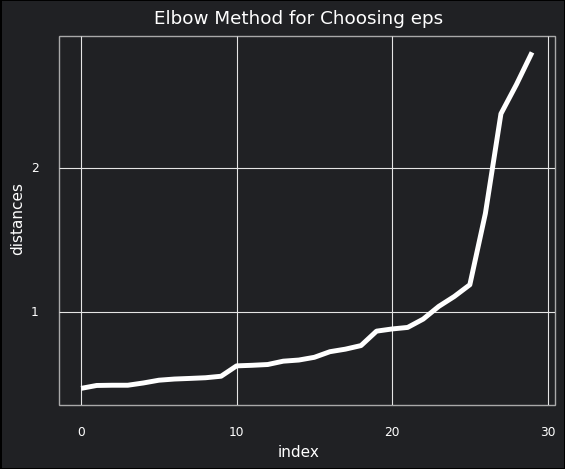

<ggplot: (8735966994597)>

In [15]:
# code, run by pressing "run" button to the left of this comment

# Determining epsilon for DBSCAN
mins = 5
nn = NearestNeighbors(n_neighbors= mins + 1)
nn.fit(zCluster[cluster_variables])

distances, neighbors = nn.kneighbors(zCluster[cluster_variables])
distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

# Notice About how Epsilon for DBSCAN is Determined:
Based on the Dendogram (shown above) based on a specific minimum number of neighboring points to determine a cluster, the Epsilon value used for DBSCAN Clustering is determined by the y-value of the "Elbow" of the Dendogram graph, right before the graph rapidly shoots upwards.

In [16]:
# code, run by pressing "run" button to the left of this comment

# According to the model, with 5 min neighbors, best epsilon is around 1.036
db_model = DBSCAN(eps = 1.036, min_samples = 5).fit(zCluster[cluster_variables])

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db_model.labels_)))]

zCluster["assignments"] = db_model.labels_
# only clustered data points
db_clustered = zCluster.loc[(zCluster.assignments >= 0)]

# Could not get a silhouette score for only the clustered points as DBSCAN had only
# determined that one cluster exists within the data and decided that the rest of
# the data points are considered noise.

# Overall Data (Clustering in Regards to all points Including Noise)
print("Silhouette score for DBSCAN for overall data",
      silhouette_score(zCluster[cluster_variables], zCluster["assignments"]))

Silhouette score for DBSCAN for overall data 0.5333313784438912


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


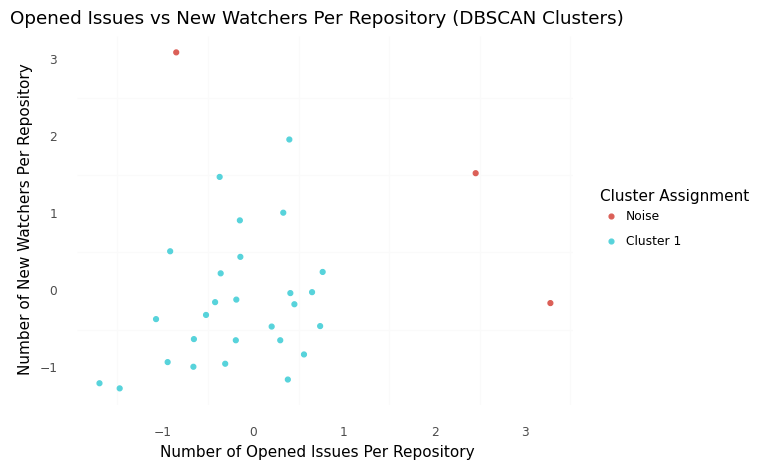

<ggplot: (8735966889389)>

In [17]:
# code, run by pressing "run" button to the left of this comment

# DBSCAN Clustering Scatterplot for Opened Issues Per Repository vs
# New Watchers Per Repository
(ggplot(zCluster, aes(x = "Opened Issues Per Repository", y = "New Watchers Per Repository",
                       color = "factor(assignments)")) + geom_point() +
 theme_minimal() + scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(x = "Number of Opened Issues Per Repository", y = "Number of New Watchers Per Repository",
     title = "Opened Issues vs New Watchers Per Repository (DBSCAN Clusters)"))

In [18]:
# code, run by pressing "run" button to the left of this comment

# Create a column to determine whether a Programming Language has been released prior to 1993
zCluster["Released Prior to 1993"] = zCluster["Appeared In Year"] <= 1993
# Determining percentage of DBSCAN Cluster 
dbscan_cluster = zCluster.loc[zCluster["assignments"] == 0]
dbscan_noise = zCluster.loc[zCluster["assignments"] == -1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in DBScan Cluster Prior to 1993
DB_before_1993 = dbscan_cluster.loc[dbscan_cluster["Released Prior to 1993"]]
print("Total Number of Programming Languages in DBScan Cluster: ", len(dbscan_cluster))
print("Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993: ", len(DB_before_1993))
print("Percentage of Programming Languages in DBScan Cluster Released Prior to 1993: ",
      len(DB_before_1993) / len(dbscan_cluster) * 100, "%")
print("Languages in DBScan Cluster that were Released Prior to 1993: ")
print(DB_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Cluster:  27
Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993:  13
Percentage of Programming Languages in DBScan Cluster Released Prior to 1993:  48.148148148148145 %
Languages in DBScan Cluster that were Released Prior to 1993: 
     Python
          C
      Shell
Objective-C
          R
       VimL
       Perl
        TeX
 Emacs Lisp
    Haskell
        Lua
     Matlab
   Makefile


In [20]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages in DBScan Cluster Appearing After 1993
DB_after_1993 = dbscan_cluster.loc[dbscan_cluster["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in DBScan Cluster: ", len(dbscan_cluster))
print("Total Number of Programming Languages in DBScan Cluster that were Released After to 1993: ", len(DB_after_1993))
print("Percentage of Programming Languages in DBScan Cluster Released After to 1993: ",
      len(DB_after_1993) / len(dbscan_cluster) * 100, "%")
print("Languages in DBScan Cluster that were Released After 1993: ")
print(DB_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Cluster:  27
Total Number of Programming Languages in DBScan Cluster that were Released After to 1993:  14
Percentage of Programming Languages in DBScan Cluster Released After to 1993:  51.85185185185185 %
Languages in DBScan Cluster that were Released After 1993: 
  JavaScript
        Java
         CSS
         PHP
        Ruby
          C#
          Go
CoffeeScript
       Scala
     Clojure
     Arduino
      Groovy
      Puppet
  PowerShell


In [21]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages in Noise Cluster Appearing Prior to 1993
DB_noise_before_1993 = dbscan_noise.loc[dbscan_noise["Released Prior to 1993"]]
print("Total Number of Programming Languages in DBScan Cluster: ", len(dbscan_noise))
print("Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993: ",
      len(DB_noise_before_1993))
print("Percentage of Programming Languages in DBScan Cluster Released Prior to 1993: ",
      len(DB_noise_before_1993) / len(dbscan_noise) * 100, "%")
print("Languages in DBScan Noise Cluster that were Released Prior to 1993: ")
print(DB_noise_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Cluster:  3
Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993:  1
Percentage of Programming Languages in DBScan Cluster Released Prior to 1993:  33.33333333333333 %
Languages in DBScan Noise Cluster that were Released Prior to 1993: 
C++


In [22]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages in Noise Cluster Appearing After 1993
DB_noise_after_1993 = dbscan_noise.loc[dbscan_noise["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in DBScan Cluster: ", len(dbscan_noise))
print("Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993: ",
      len(DB_noise_after_1993))
print("Percentage of Programming Languages in DBScan Cluster Released Prior to 1993: ",
      len(DB_noise_after_1993) / len(dbscan_noise) * 100, "%")
print("Languages in DBScan Noise Cluster that were Released Prior to 1993: ")
print(DB_noise_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Cluster:  3
Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993:  2
Percentage of Programming Languages in DBScan Cluster Released Prior to 1993:  66.66666666666666 %
Languages in DBScan Noise Cluster that were Released Prior to 1993: 
Swift
 Rust


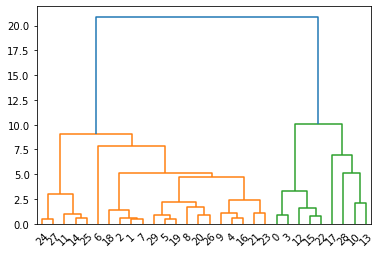

In [23]:
# code, run by pressing "run" button to the left of this comment

# Ward Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_ward = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")
hac_ward.fit(cluster_data[cluster_variables])
dendro_ward = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='ward'))

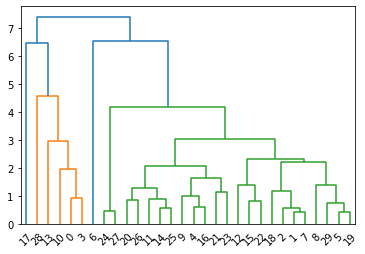

In [24]:
# code, run by pressing "run" button to the left of this comment

# Average Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_avg = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "average")
hac_avg.fit(cluster_data[cluster_variables])
dendro_avg = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='average'))

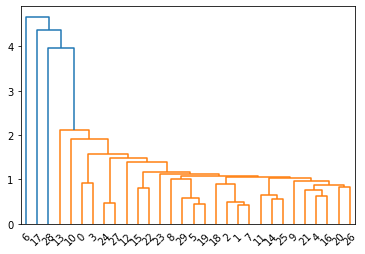

In [25]:
# code, run by pressing "run" button to the left of this comment

# Single Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_single = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "single")
hac_single.fit(cluster_data[cluster_variables])
dendro_single = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='single'))

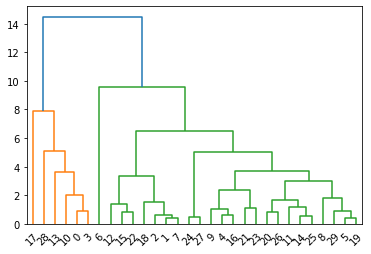

In [26]:
# code, run by pressing "run" button to the left of this comment

# Complete Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_complete = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "complete")
hac_complete.fit(cluster_data[cluster_variables])
dendro_complete = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='complete'))

In [27]:
# code, run by pressing "run" button to the left of this comment

# Performing Heirarchical Clustering using Complete Linkage as the criteria for clusters
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "complete")
hac.fit(zCluster[cluster_variables])
membership = hac.labels_
print("Hierarchical Clustering Silhouette Score: ",
      silhouette_score(zCluster[cluster_variables], membership))

Hierarchical Clustering Silhouette Score:  0.46871360964179304


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


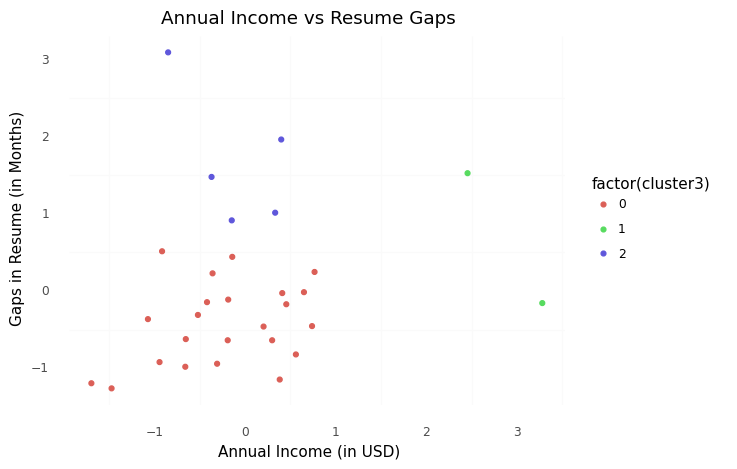

<ggplot: (8735964063897)>

In [28]:
# code, run by pressing "run" button to the left of this comment

# General Scatterplot with Heirarchal Clustering using Complete Linkage
zCluster["cluster3"] = membership
(ggplot(zCluster, aes(x = "Opened Issues Per Repository",
                     y = "New Watchers Per Repository")) +
 geom_point(aes(color = "factor(cluster3)")) + theme_minimal() +
 theme(panel_grid_major = element_blank()) +
 labs(x = "Annual Income (in USD)", y = "Gaps in Resume (in Months)",
      title = "Annual Income vs Resume Gaps")) 

In [29]:
# code, run by pressing "run" button to the left of this comment

# Creating sub-DataFrames for each of the clusters
cluster_zero = zCluster.loc[zCluster["cluster3"] == 0]
cluster_one = zCluster.loc[zCluster["cluster3"] == 1]
cluster_two = zCluster.loc[zCluster["cluster3"] == 2]

In [30]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Zero Prior to 1993
C0_before_1993 = cluster_zero.loc[cluster_zero["Released Prior to 1993"]]
print("Total Number of Programming Languages in Cluster Zero: ", len(cluster_zero))
print("Total Number of Programming Languages in Cluster Zero that were Released Prior to 1993: ", len(C0_before_1993))
print("Percentage of Programming Languages in Cluster Zero Released Prior to 1993: ",
      len(C0_before_1993) / len(cluster_zero) * 100, "%")
print("Languages in Cluster Zero that were Released Prior to 1993: ")
print(C0_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Zero:  23
Total Number of Programming Languages in Cluster Zero that were Released Prior to 1993:  12
Percentage of Programming Languages in Cluster Zero Released Prior to 1993:  52.17391304347826 %
Languages in Cluster Zero that were Released Prior to 1993: 
    Python
         C
     Shell
         R
      VimL
      Perl
       TeX
Emacs Lisp
   Haskell
       Lua
    Matlab
  Makefile


In [31]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Zero After 1993
C0_after_1993 = cluster_zero.loc[cluster_zero["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in Cluster Zero: ", len(cluster_zero))
print("Total Number of Programming Languages in Cluster Zero that were Released After 1993: ", len(C0_after_1993))
print("Percentage of Programming Languages in Cluster Zero Released After 1993: ",
      len(C0_after_1993) / len(cluster_zero) * 100, "%")
print("Languages in Cluster Zero that were Released After 1993: ")
print(C0_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Zero:  23
Total Number of Programming Languages in Cluster Zero that were Released After 1993:  11
Percentage of Programming Languages in Cluster Zero Released After 1993:  47.82608695652174 %
Languages in Cluster Zero that were Released After 1993: 
        Java
         PHP
        Ruby
          C#
CoffeeScript
       Scala
     Clojure
     Arduino
      Groovy
      Puppet
  PowerShell


In [32]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster One Prior to 1993
C1_before_1993 = cluster_one.loc[cluster_one["Released Prior to 1993"]]
print("Total Number of Programming Languages in Cluster One: ", len(cluster_one))
print("Total Number of Programming Languages in Cluster One that were Released Prior to 1993: ", len(C1_before_1993))
print("Percentage of Programming Languages in Cluster One Released Prior to 1993: ",
      len(C1_before_1993) / len(cluster_one) * 100, "%")
print("Languages in Cluster One that were Released Prior to 1993: ")
print(C1_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster One:  2
Total Number of Programming Languages in Cluster One that were Released Prior to 1993:  1
Percentage of Programming Languages in Cluster One Released Prior to 1993:  50.0 %
Languages in Cluster One that were Released Prior to 1993: 
C++


In [33]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster One After 1993
C1_after_1993 = cluster_one.loc[cluster_one["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in Cluster One: ", len(cluster_one))
print("Total Number of Programming Languages in Cluster One that were Released After 1993: ", len(C1_after_1993))
print("Percentage of Programming Languages in Cluster One Released After 1993: ",
      len(C1_after_1993) / len(cluster_one) * 100, "%")
print("Languages in Cluster One that were Released After 1993: ")
print(C1_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster One:  2
Total Number of Programming Languages in Cluster One that were Released After 1993:  1
Percentage of Programming Languages in Cluster One Released After 1993:  50.0 %
Languages in Cluster One that were Released After 1993: 
Rust


In [34]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Two Prior to 1993
C2_before_1993 = cluster_two.loc[cluster_two["Released Prior to 1993"]]
print("Total Number of Programming Languages in Cluster Two: ", len(cluster_two))
print("Total Number of Programming Languages in Cluster Two that were Released Prior to 1993: ", len(C2_before_1993))
print("Percentage of Programming Languages in Cluster Two Released Prior to 1993: ",
      len(C2_before_1993) / len(cluster_two) * 100, "%")
print("Languages in Cluster Two that were Released Prior to 1993: ")
print(C2_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Two:  5
Total Number of Programming Languages in Cluster Two that were Released Prior to 1993:  1
Percentage of Programming Languages in Cluster Two Released Prior to 1993:  20.0 %
Languages in Cluster Two that were Released Prior to 1993: 
Objective-C


In [35]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Two After 1993
C2_after_1993 = cluster_two.loc[cluster_two["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in Cluster Two: ", len(cluster_two))
print("Total Number of Programming Languages in Cluster Two that were Released After 1993: ", len(C2_after_1993))
print("Percentage of Programming Languages in Cluster Two Released After 1993: ",
      len(C2_after_1993) / len(cluster_two) * 100, "%")
print("Languages in Cluster Two that were Released After 1993: ")
print(C2_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Two:  5
Total Number of Programming Languages in Cluster Two that were Released After 1993:  4
Percentage of Programming Languages in Cluster Two Released After 1993:  80.0 %
Languages in Cluster Two that were Released After 1993: 
JavaScript
       CSS
        Go
     Swift


# **Q3.**
(Feature Reduction) Apply LASSO to the Linear Regression model created in Question 1 and based on the variables that LASSO determines to have a coefficient, create another Linear Regression model. How did this effect the original model? What does this tell you about the GitHut data regarding Programming Languages used in GitHub repositories?

In [39]:
# code, run by pressing "run" button to the left of this comment

# Manual Method of Applying LASSO, which involves choosing the variables to exclude
# based on the LASSO coefficients of each of the variables used in the original
# Linear Regression model

# Determining alpha value to use for LASSO
lsr_alpha = LassoCV(cv = 5).fit(x_train[predictors_all],
                                y_train["Appeared In Year"])
print("The alpha to use for LASSO is: ", lsr_alpha.alpha_)
print("\n \n")

The alpha to use for LASSO is:  3.456872390218585

 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2780284972627669, tolerance: 0.22448000000000004
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6991832125052042, tolerance: 0.22448000000000004
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8374239417091758, tolerance: 0.22448000000000004
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7086205069463176, tolerance: 0.224480

# Warning Notice Note

The *Convergence Warning* notification from the manual alpha-selection for LASSO is a likely result from having too little of a dataset to work with.

In [37]:
# code, run by pressing "run" button to the left of this comment

logistic_co = lr_all.coef_[0]

# Create Lasso Model and get its Coefficients
lasso = Lasso(alpha = lsr_alpha.alpha_, fit_intercept = True,
              tol=0.000001, max_iter = 100000)

lasso.fit(x_train[predictors_all], y_train["Appeared In Year"])
lasso_co = lasso.coef_
conames = ["Active", "Pushes", "Pushes/Repository",
                  "New Forks", "Issues", 
                  "New Watchers"] * 2
# Create the dataframe to use to graph the comparison between the coefficients 
# for each variable as determined by Logistic Regression and LASSO
model_coefs = np.concatenate([logistic_co,lasso_co])
model = np.repeat(np.array(["Linear", "LASSO"]), [6,6], axis=0)

compare_df = pd.DataFrame({"conames": conames, "coefs": model_coefs, "model": model})
compare_df["Odds Coefs"] = np.exp(compare_df["coefs"])
compare_df

,conames,coefs,model,Odds Coefs
0,Active,-1.638289e+01,Linear,7.673617e-08
1,Pushes,1.521883e+01,Linear,4.068699e+06
2,Pushes/Repository,-2.143425e+00,Linear,1.172526e-01
3,New Forks,7.167881e-02,Linear,1.074310e+00
4,Issues,-3.853283e-01,Linear,6.802273e-01
5,New Watchers,3.962142e+00,Linear,5.256982e+01
6,Active,-0.000000e+00,LASSO,1.000000e+00
7,Pushes,-0.000000e+00,LASSO,1.000000e+00
8,Pushes/Repository,-0.000000e+00,LASSO,1.000000e+00
9,New Forks,0.000000e+00,LASSO,1.000000e+00


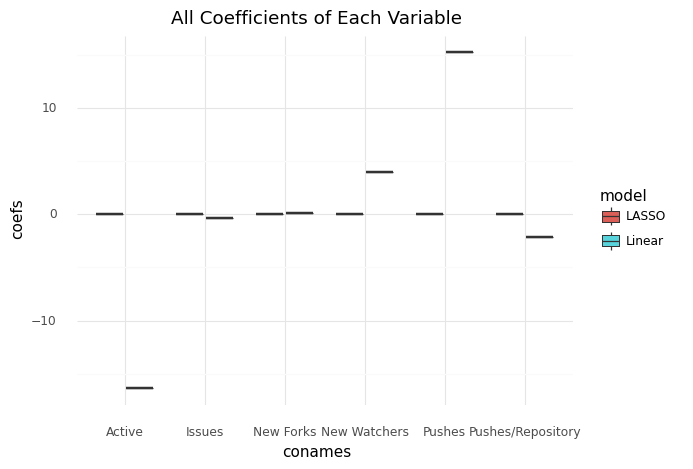

<ggplot: (8735963966873)>

In [38]:
# code, run by pressing "run" button to the left of this comment

# Boxplot comparing the coefficients of variables between Logistic and LASSO model
(ggplot(compare_df, aes(x = "conames", y = "coefs", fill = "model")) +
geom_boxplot() + ggtitle("All Coefficients of Each Variable") +
 theme(axis_text_x = element_text(angle = 75)) +
 theme_minimal())

In [40]:
# code, run by pressing "run" button to the left of this comment

# Creating a new Logistic Model based on variables with non-zero LASSO Coefficients
lasso_var = ["New Watchers Per Repository"]
lr_lasso = LinearRegression()
lr_lasso.fit(x_train[lasso_var], y_train["Appeared In Year"])

lasso_trained = lr_lasso.predict(x_train[lasso_var])
lasso_predicted = lr_lasso.predict(x_test[lasso_var])

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Opened Issues Per Repository...")
print("Lasso Training data R2 Score:",
      r2_score(y_train, lasso_trained))
print("Lasso Training data Mean Squared Error Score:",
      mean_squared_error(y_train, lasso_trained))

print("\n")

print("Lasso Testing data R2 Score:",
      r2_score(y_test, lasso_predicted))
print("Lasso Training data Mean Squared Error Score: ",
      mean_squared_error(y_test, lasso_predicted))

For the Linear Regression Model excluding Number of Opened Issues Per Repository...
Lasso Training data R2 Score: 0.09503086844057518
Lasso Training data Mean Squared Error Score: 113.79829716663316


Lasso Testing data R2 Score: 0.3530214194316901
Lasso Training data Mean Squared Error Score:  90.66685941575344


In [43]:
# code, run by pressing "run" button to the left of this comment

# Using the automatic application of LASSO, in which we do not know which
# variables have been used or excluded from the new Linear Regression Model

lsr_tune = LassoCV(cv = 5).fit(x_train[predictors_all],y_train["Appeared In Year"])

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Opened Issues Per Repository...")
print("Lasso Training data R2 Score:",
      r2_score(y_train, lsr_tune.predict(x_train[predictors_all])))
print("Lasso Training data Mean Squared Error Score:",
      mean_squared_error(y_train, lsr_tune.predict(x_train[predictors_all])))

print("\n")

print("Lasso Testing data R2 Score:",
      r2_score(y_test, lsr_tune.predict(x_test[predictors_all])))
print("Lasso Training data Mean Squared Error Score: ",
      mean_squared_error(y_test, lsr_tune.predict(x_test[predictors_all])))

print("\nwe chose " + str(lsr_tune.alpha_) + " as our alpha.")
print("\n \n")

For the Linear Regression Model excluding Number of Opened Issues Per Repository...
Lasso Training data R2 Score: 0.0
Lasso Training data Mean Squared Error Score: 125.7482638888889


Lasso Testing data R2 Score: -0.011905351833497058
Lasso Training data Mean Squared Error Score:  141.80729166666646

we chose 3.456872390218585 as our alpha.

 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2780284972627669, tolerance: 0.22448000000000004
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6991832125052042, tolerance: 0.22448000000000004
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8374239417091758, tolerance: 0.22448000000000004
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7086205069463176, tolerance: 0.224480

In [ ]:
# code, only run for PDF export purposes. Mostly irrelevant to the actual coding
# aspect of the final project.

# The following code is specifically for creating a PDF containing the outputs of
# the notebook as a PDF, do not run for general testing

# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over.
!cp "drive/My Drive/Colab Notebooks/CPSC354_FA22_Project.ipynb" ./

# converting file to PDF, should appear under "Files" tab in the left sidebar.
!jupyter nbconvert --to PDF "CPSC354_FA22_Project.ipynb"